# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__The distribution is not normal and looks more like poisson distribution. The majority of patients are charged <$20000. Despite the distribition being skewed, the average is still a good representation of charge per patient and can be used to estimate hospital's income. The large standard deviation (almost as big as the mean) indicates the large spread of data.

Text(0.5, 1.0, 'Frequency distribution of patients based on charge amount')

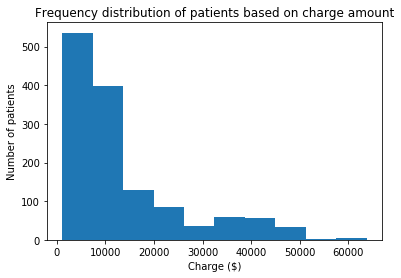

In [6]:
plt.hist(medical.charges, bins=10)
plt.xlabel('Charge ($)')
plt.ylabel('Number of patients')
plt.title('Frequency distribution of patients based on charge amount')

In [7]:
mean = np.mean(medical.charges)
std = np.std(medical.charges, ddof=1)
print('The mean is: ', mean)
print('The standard deviation is: ', std)

The mean is:  13270.422265141257
The standard deviation is:  12110.011236693994


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__Given the random sample of charges, I can estimate the population parameters (actual charges) and then compare it to 1200. Since the sample charges are not normally distributed, I can use a t-test to answer the question whether the average charges have fallen below $1200. 

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__Since the administrator is concerned with the average falling below 1200, the appropriate interval will be one-sided.The 95% confidence interval is 12725-13270. 1200 is not in this interval so we can be 95% confident that the actual average charges have not fallen below 1200.

In [11]:
from scipy.stats import t
crit_value = t.ppf(0.95, len(medical.charges)-1) # critical value
crit_value

1.6459941145571317

In [12]:
ste = std/np.sqrt(len(medical.charges)) # standard error of the mean
me = ste*crit_value # margin of error
me

544.9350813250251

In [13]:
lower_bound = mean - me
print("The confidence interval is ",lower_bound, mean)

The confidence interval is  12725.48718381623 13270.422265141257


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__Null hypothesis: people with or without insurance are charged the same amount. Alternative hypothesis: people with insurance are charged a different amount. For this calculation of the t-statistic we assume the two samples compared have an equal variance.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ manual calculation: t-statistic = -11.89329903087671, p-value = 4.461230231620972e-31; scipy calculation: t-statistic = -11.893299030876712, p-value = 4.461230231620717e-31. Based on a very small p-value, people with insurance are indeed paying a different amount than people without insurance. And since the t-statistic is negative, it means people with insurance pay more than patients without insurance, on average.

In [16]:
x0 = np.mean(medical[medical.insuranceclaim==0]['charges']) # average charge for the sample of people without health insurance
x1 = np.mean(medical[medical.insuranceclaim==1]['charges']) # average charge for the sample of people with health insurance
s0 = np.std(medical[medical.insuranceclaim==0]['charges'], ddof=1) # standard deviation of the sample without health insurance
s1 = np.std(medical[medical.insuranceclaim==1]['charges'], ddof=1) # standard deviation of the sample with health insurance
n0 = len(medical[medical.insuranceclaim==0]['charges']) # sample size without insurance
n1 = len(medical[medical.insuranceclaim==1]['charges']) # sample size with insurance
print(x0, x1, s0, s1, n0, n1)

8821.421892306294 16423.928276537663 6446.510126811736 14045.928418802127 555 783


In [17]:
sp = np.sqrt(((n0-1)*s0**2+(n1-1)*s1**2)/(n0+n1-2)) # pooled standard deviation
tstat = (x0-x1)/(sp*np.sqrt(1/n0+1/n1)) # t statistic
df = n0+n1-2 # degrees of freedom
p_val = 2*t.cdf(tstat, df) # since this is a 2-tailed test, need to multiply p-Value by 2
print(tstat, p_val)

-11.89329903087671 4.461230231620972e-31


In [18]:
from scipy.stats import ttest_ind
woins = medical[medical.insuranceclaim==0]['charges'] # sample without insurance
wins = medical[medical.insuranceclaim==1]['charges'] # smaple with insurance
ttest_ind(woins,wins)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__statistic=-13.298031957975649, pvalue=1.1105103216309125e-37, charges are still significanlty different for patients with health insurance. t-statistic is negative, so on average, patients with health insurance pay more.

In [19]:
ttest_ind(woins,wins, equal_var = False)

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__There is no separate test for performing a z-test. However, as degrees of freedom increase (>30), the t-distribution becomes very similar to normal distribution. Hence, the p-value (confidence level) calculation from a normal distribution will produce essentially the same value as the t-distribution (with >30 degrees of freedom). Since we want to use a t-test for small samples (<30) and for samples >30 t-test is a good enough approximation,then having a single test is sufficient.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test